In [1]:
import numpy as np
from carUtils import *
from linesUtils import *
from env import *
import glob
import tqdm
from PIL import Image

sensor_locs=Car_specs['sensor_spacing']*3.5-\
                    np.arange(Car_specs['num_sensors'])*Car_specs['sensor_spacing']
        
#load sensor data
T=[]
X=[[],[],[],[],[],[],[],[]]
for file in glob.glob("measurements/*.npy"):
    t=int(file[len("measurements\\measurment"):-4])
    raw_data=np.load(file)
    T+=[t]*raw_data.shape[0]
    for i in range(8):
        X[i]+=list(raw_data[:,i])
        #print(raw_data[:,i].shape)

X=np.array(X)
T=np.array(T)
X=X[:,np.all(X>0,axis=0)]
T=T[np.all(X>0,axis=0)]
T=T[np.all(X<=2500,axis=0)]
X=X[:,np.all(X<=2500,axis=0)]



line_locs=-4+T*0.2
# sensor_models=[]
# for i in range(8):
#     x=np.abs(line_locs-sensor_locs[i])

#     sensor_models.append(SensorValueModel().fit(x,X[i,:]).get_value)

# return sensor_models

In [23]:
np.max(X,axis=1)

array([2500, 2494, 2399, 2351, 1707, 2257, 2375, 2500])

In [3]:
norm_x=X.T-np.min(X,axis=1)
norm_x=norm_x*1000/np.max(norm_x,axis=0)

In [4]:
minX=np.min(X,axis=1)
maxNormX=np.max(X.T-np.min(X,axis=1),axis=0)

In [5]:
weights=np.array([8,4,2,1,-1,-2,-4,-8])

In [6]:
def sensor_fusion(sensor_Values):
    #print(((sensor_Values-minX)*1000/maxNormX))
    return np.dot(((sensor_Values-minX)*1000/maxNormX),weights)

In [7]:
np.min(X,axis=1)

array([412, 550, 573, 643, 549, 527, 481, 527])

In [8]:
maxNormX

array([2088, 1944, 1826, 1708, 1158, 1730, 1894, 1973])

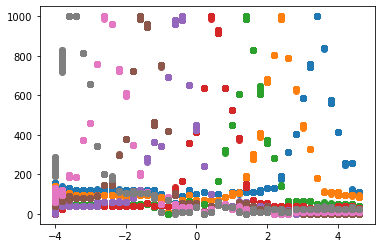

In [9]:
for i in range(8):
    plt.plot(line_locs,norm_x[:,i],"o")
    
    
# plt.plot(line_locs[0],sensor_fusion(X[:,0])[0],"o")

In [10]:
class PID:
    def __init__(self,k_p,k_d,k_i):
        
        self.k_p=k_p
        self.k_d=k_d
        self.k_i=k_i
        #self.errors=[0]
        
    def forward(self,error):

        correction=self.k_p*error

            
        #self.errors.append(error)
        return correction
        

In [11]:
def test_line_maker():
#     lines=[Line((15,-15),(40,-15))]

#     lines+=make_curve(90, 5, start_point=[0,0],n_lines=50,left=True)
#     lines+=make_curve(-90, 15, start_point=[0,0],n_lines=10,left=False)
#     lines+=[Line((-15,5),(-5,5))]
    lines=[Line((-90,-15),(40,-15))]
    return lines,40,-15,180,-15,15

array([ 353.57453115, 2716.78663864,  927.78456986, -125.38229062,
       1850.11472263,  427.57111201, 1639.59082448, -858.24449609])

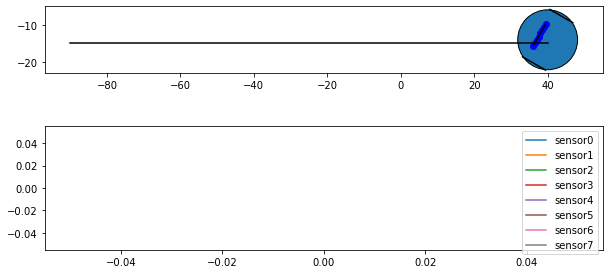

In [12]:
e=Env(line_generator=test_line_maker)
e.car.set_loc(40,-14,150)
e.plot()

base_speed=10
e.move_car(base_speed,base_speed)

In [13]:
controller=PID(10000,0,0)
base_speed=20

readings=e.move_car(base_speed,base_speed)

errors=[]
distance=[]
corrections=[]
for i in tqdm.tqdm(range(4000)):
    error=sensor_fusion(readings)
    errors.append(error)
    correction=controller.forward(error)
    corrections.append(correction)
    distance.append(e.distance_from_track())
    readings=e.move_car(min(max(base_speed+correction,0),255),min(max(base_speed-correction,0),255))
    if i%100==0:
        e.plot("PID",f"{i}.png")

100%|██████████████████████████████████████| 4000/4000 [00:19<00:00, 201.90it/s]


In [14]:
error

10318.224345714149

In [15]:
e.move_car(0,0)

array([-1130.51746573,   417.98970414,   819.61862971,  1964.65097942,
        2472.74688619,  -622.05780472,   951.78705838,   313.74366825])

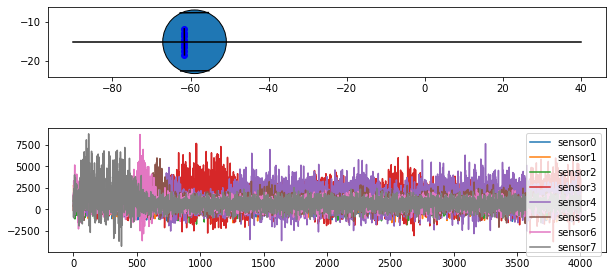

In [16]:
e.plot()

In [17]:
images=[]
for i in tqdm.tqdm(range(1000)):
    if i%10==0:
        images.append(Image.open(f"PID/{i}.png"))

100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 17264.13it/s]


In [18]:
frame_one = images[0]
frame_one.save("PID.gif", format="GIF", append_images=images,
           save_all=True, duration=100, loop=0)

In [19]:
# plt.plot(errors,corrections)

In [20]:
errors

[3809.2168341119705,
 2977.1686134419024,
 -11375.006084401397,
 1737.8594679105497,
 7911.347483971724,
 -11448.548404854202,
 -3279.9339839358618,
 -9800.205255139233,
 -19436.909107545853,
 -7797.65107801165,
 1303.4564177104903,
 -15628.163959426834,
 -4498.509835843516,
 -8870.495650447287,
 -15689.839922456837,
 2399.990213815814,
 -12689.768323339538,
 3569.1611723205347,
 -6141.422265299661,
 -9753.09998456527,
 -15964.785619653052,
 -5191.867224770693,
 -11484.436820967398,
 -6962.082621406584,
 -11746.332452603268,
 -18110.78651577554,
 2136.8925453320207,
 -2376.427695876705,
 5019.697718380153,
 -807.8260195633006,
 -11975.04773383338,
 967.1162561175233,
 -14716.46437196347,
 -6722.314958397435,
 789.1592942670281,
 6994.517498020081,
 7718.988202152466,
 -455.65025952515634,
 -7688.749514348547,
 1839.9453528706006,
 1996.7299711931928,
 8623.231971761452,
 -7244.109149844431,
 -129.95759388862598,
 16964.294853450614,
 -2778.590226452969,
 -13272.081025037953,
 -281.0760

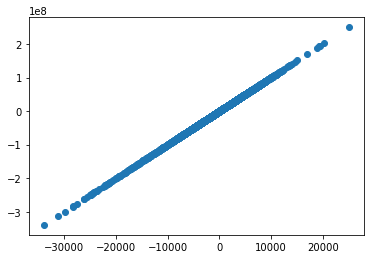

In [21]:
plt.plot(errors,corrections,"o")

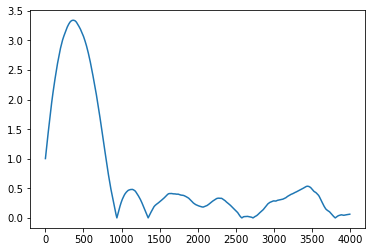

In [22]:
plt.plot(distance)